In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [2]:
df = pd.read_csv("gastos-deputados.csv")
df.head()

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido
0,2018,6,2018-06-25 00:00:00+00:00,GIACOBO,PR,PR,LOCAÇÃO OU FRETAMENTO DE AERONAVES,75543611000185,HELISUL TAXI AEREO LTDA,13400.0,0.0,13400.0
1,2018,6,2018-06-11 00:00:00+00:00,ÁTILA LIRA,PSB,PI,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03003930000197,CEARA TAXI AEREO LTDA,7240.0,0.0,7240.0
2,2018,6,2018-06-08 00:00:00+00:00,JUTAHY JUNIOR,PSDB,BA,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14674451000119,ATA AEROTAXI ABAETE LTDA,7500.0,0.0,7500.0
3,2018,6,2018-06-08 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03090756000167,AMAZONAVES TAXI AEREO LTDA,20000.0,0.0,20000.0
4,2018,6,2018-06-04 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPACOES LTDA,7500.0,0.0,7500.0


In [3]:
df.datemissao.head()

0    2018-06-25 00:00:00+00:00
1    2018-06-11 00:00:00+00:00
2    2018-06-08 00:00:00+00:00
3    2018-06-08 00:00:00+00:00
4    2018-06-04 00:00:00+00:00
Name: datemissao, dtype: object

In [4]:
# converting the date column: 

df['date'] = pd.to_datetime(df['datemissao'], format="%Y-%m-%d") 
df.head()

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido,date
0,2018,6,2018-06-25 00:00:00+00:00,GIACOBO,PR,PR,LOCAÇÃO OU FRETAMENTO DE AERONAVES,75543611000185,HELISUL TAXI AEREO LTDA,13400.0,0.0,13400.0,2018-06-25
1,2018,6,2018-06-11 00:00:00+00:00,ÁTILA LIRA,PSB,PI,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03003930000197,CEARA TAXI AEREO LTDA,7240.0,0.0,7240.0,2018-06-11
2,2018,6,2018-06-08 00:00:00+00:00,JUTAHY JUNIOR,PSDB,BA,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14674451000119,ATA AEROTAXI ABAETE LTDA,7500.0,0.0,7500.0,2018-06-08
3,2018,6,2018-06-08 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03090756000167,AMAZONAVES TAXI AEREO LTDA,20000.0,0.0,20000.0,2018-06-08
4,2018,6,2018-06-04 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPACOES LTDA,7500.0,0.0,7500.0,2018-06-04


In [5]:
df.dtypes

numano                        int64
nummes                        int64
datemissao                   object
txnomeparlamentar            object
sgpartido                    object
sguf                         object
txtdescricao                 object
txtcnpjcpf                   object
txtfornecedor                object
vlrdocumento                float64
vlrglosa                    float64
vlrliquido                  float64
date                 datetime64[ns]
dtype: object

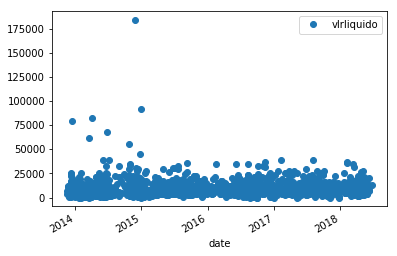

In [6]:
df.plot(marker="o", linestyle='', x='date', y='vlrliquido')

In [6]:
# Narrowing down the df to the current term of office: 

df_2014_2018 = df[df.datemissao > '2014-10-05']

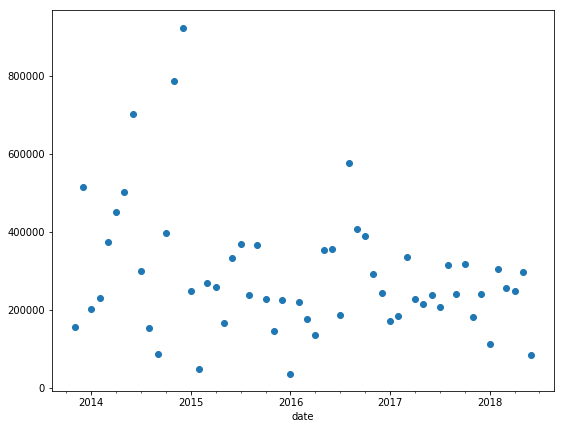

In [8]:
# Plotting the sum of money spent on airplanes each month: 

df.resample('M', on='date').vlrliquido.sum().plot(legend=False, figsize=(9,7), marker='o', linestyle=' ')

# .sum() and .count() give me the same result 

In [8]:
df_month = df_2014_2018.resample('M', on='date').vlrliquido.sum().reset_index()

/Users/julialedur/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Franklin Gothic Heavy'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


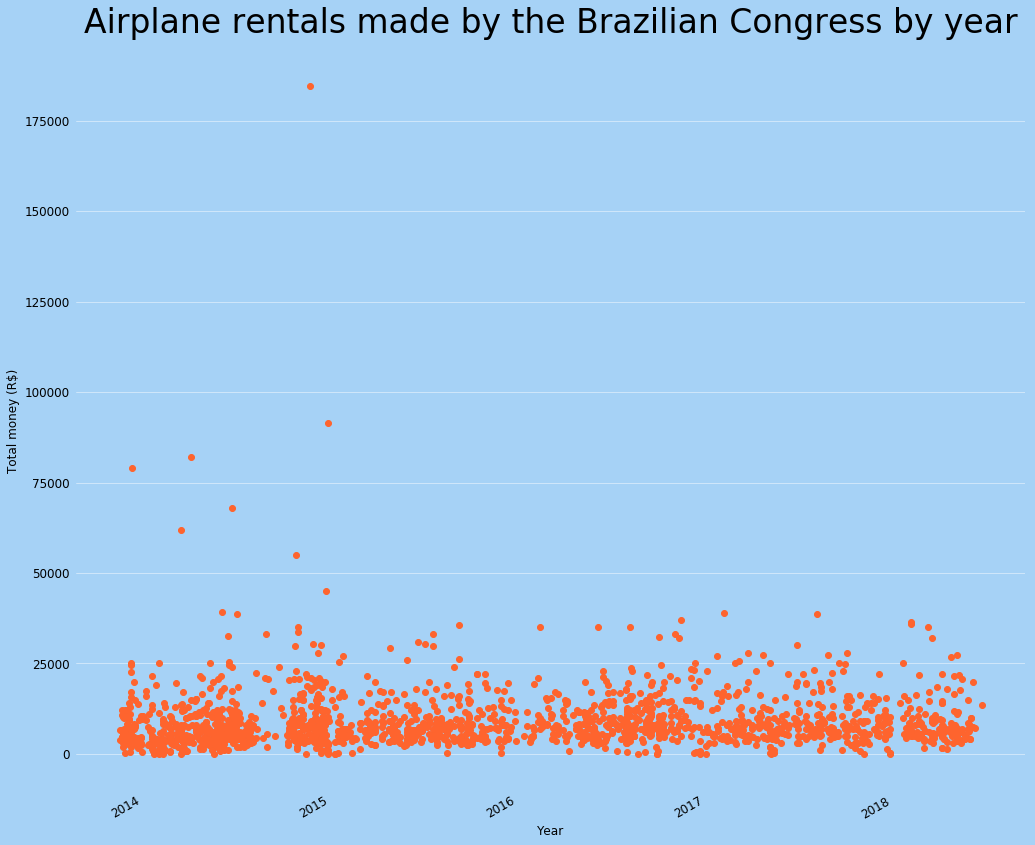

In [12]:
#ax = df_2014_2018.resample('M', on='date').vlrliquido.count().plot(legend=False, figsize=(17,15), marker='o', linestyle=' ', color='#FE642E')
ax = df.plot(marker="o", linestyle='', x='date', y='vlrliquido', color='#FE642E', legend=False, figsize=(17,15))

#df_2014_2018.plot(kind='scatter', x='date', y='vlrliquido', legend=False, figsize=(17,15), color='#FE642E')
#df.plot.scatter(s=170, x='numano', y='vlrliquido', color='#FE642E', alpha=0.5, figsize=(17,15))
ax.set_title('Airplane rentals made by the Brazilian Congress by year', pad=20, color='black')
ax.set_ylabel('Total money (R$)')    
ax.set_xlabel('Year')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
#ax.set_facecolor('#A6D2F6')

ax.grid(True, axis='y', color='white', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#A6D2F6', # colors the outside
    'axes.facecolor': '#A6D2F6', # colors the inside 
    'font.size': 12,
    'text.color': 'black',
    'axes.labelcolor': 'black'
})

sharex=False 


#plt.savefig('airplanes.pdf')


/Users/julialedur/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Franklin Gothic Heavy'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


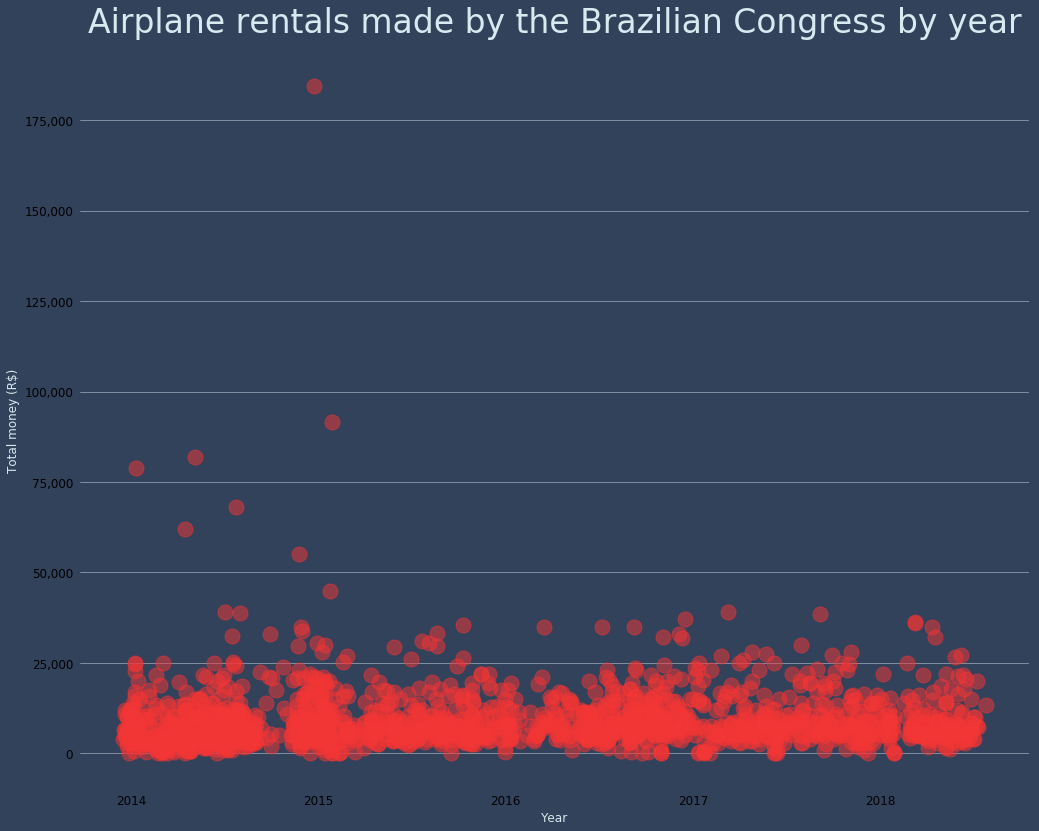

In [15]:
ax = df.plot(marker="o", linestyle='', x='date', y='vlrliquido', color='#f33535', markersize=15, alpha=0.5, legend=False, figsize=(17,15))

ax.set_title('Airplane rentals made by the Brazilian Congress by year', pad=20)
ax.set_ylabel('Total money (R$)')    
ax.set_xlabel('Year')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
#ax.set_facecolor('#A6D2F6')

ax.grid(True, axis='y', color='#d8e9f0', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# group_labels = [2015, '' , 2016, '' , 2017, '' , 2018]

# ax.set_xticklabels(group_labels)
ax.tick_params(axis='x', rotation=0)

def with_commas(value, pos): 
    return "{:,}".format(int(value))

formatter = FuncFormatter(with_commas)

ax.yaxis.set_major_formatter(formatter)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#33425b', # colors the outside
    'axes.facecolor': '#33425b', # colors the inside 
    'font.size': 12,
    'text.color': '#d8e9f0',
    'axes.labelcolor': '#d8e9f0'
})

sharex=False 


plt.savefig('airplanes-month-final.pdf')

In [13]:
df_2014_2018.shape

# I want to scatter plot every airplane rented (by month), 
# so that each dot represents an airplane (total is 1320 airplanes)
# How can I do this? 


(1320, 13)

In [14]:
df_2014_2018.resample('M', on='date').vlrliquido.value_counts()

date        vlrliquido
2014-10-31  5000.00       3
            2000.00       2
            3600.00       2
            7200.00       2
            8500.00       2
            1375.26       1
            2600.00       1
            3300.00       1
            3400.00       1
            3860.00       1
            4620.00       1
            5183.00       1
            5920.00       1
            6200.00       1
            7000.00       1
            7532.00       1
            8090.00       1
            8520.00       1
            8630.00       1
            8910.00       1
            9750.00       1
            10000.00      1
            11550.00      1
            13000.00      1
            15000.00      1
            20400.00      1
            20825.00      1
            23000.00      1
            29700.00      1
            35000.00      1
                         ..
2018-05-31  3000.00       1
            4000.00       1
            4015.84       1
            4800.00      